## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [17]:
!nvidia-smi

Sat Nov  1 13:28:30 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [32]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

# prevent ultralytics from tracking your activity
!yolo settings sync=False

import ultralytics
ultralytics.checks()

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.8/112.6 GB disk)


In [2]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [30]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="2911MmAxGMtbUNsI2Qle")
project = rf.workspace("foddetection-ha1co").project("fod-detection-1kzkm-y1lck")
version = project.version(3)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="2911MmAxGMtbUNsI2Qle")
project = rf.workspace("foddetection-ha1co").project("pist_security-2udvs")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to pist_security-1 in yolov8:: 100%|██████████| 26736/26736 [00:09<00:00, 2947.45it/s]


WARNING ⚠️ Ultralytics settings reset to default values. This may be due to a possible problem with your settings or a recent ultralytics package update. 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Custom Training

In [2]:
pip install -U ultralytics

In [3]:

!yolo task=detect mode=train \
model=yolov8n.pt \
data=/content/pist_security-1/data.yaml \
epochs= 25 \
imgsz=640 \
name='FOD_ilk_deneme'

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/pist_security-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=FOD_ilk_deneme6, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, pl

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# 1. Sonuçları sıkıştır:
!zip -r /content/FOD_ilk_deneme_v1_sonuclar.zip /content/runs/detect/FOD_ilk_deneme5/

# 2. Sıkıştırılmış dosyayı Drive'a kopyala:
!cp /content/FOD_ilk_deneme_v1_sonuclar.zip /content/drive/MyDrive/

updating: content/runs/detect/FOD_ilk_deneme5/ (stored 0%)
updating: content/runs/detect/FOD_ilk_deneme5/labels.jpg (deflated 33%)
updating: content/runs/detect/FOD_ilk_deneme5/BoxP_curve.png (deflated 15%)
updating: content/runs/detect/FOD_ilk_deneme5/results.png (deflated 9%)
updating: content/runs/detect/FOD_ilk_deneme5/weights/ (stored 0%)
updating: content/runs/detect/FOD_ilk_deneme5/weights/best.pt (deflated 9%)
updating: content/runs/detect/FOD_ilk_deneme5/weights/last.pt (deflated 9%)
updating: content/runs/detect/FOD_ilk_deneme5/val_batch2_labels.jpg (deflated 10%)
updating: content/runs/detect/FOD_ilk_deneme5/confusion_matrix_normalized.png (deflated 17%)
updating: content/runs/detect/FOD_ilk_deneme5/args.yaml (deflated 52%)
updating: content/runs/detect/FOD_ilk_deneme5/train_batch1.jpg (deflated 5%)
updating: content/runs/detect/FOD_ilk_deneme5/BoxF1_curve.png (deflated 11%)
updating: content/runs/detect/FOD_ilk_deneme5/results.csv (deflated 61%)
updating: content/runs/detec

In [10]:
# 1. Sonuçları sıkıştır:
!zip -r /content/FOD_ilk_deneme_v2_sonuclar.zip /content/runs/detect/FOD_ilk_deneme6/

# 2. Sıkıştırılmış dosyayı Drive'a kopyala:
!cp /content/FOD_ilk_deneme_v2_sonuclar.zip /content/drive/MyDrive/

updating: content/runs/detect/FOD_ilk_deneme6/ (stored 0%)
updating: content/runs/detect/FOD_ilk_deneme6/labels.jpg (deflated 34%)
updating: content/runs/detect/FOD_ilk_deneme6/BoxP_curve.png (deflated 10%)
updating: content/runs/detect/FOD_ilk_deneme6/results.png (deflated 8%)
updating: content/runs/detect/FOD_ilk_deneme6/weights/ (stored 0%)
updating: content/runs/detect/FOD_ilk_deneme6/weights/best.pt (deflated 9%)
updating: content/runs/detect/FOD_ilk_deneme6/weights/last.pt (deflated 9%)
updating: content/runs/detect/FOD_ilk_deneme6/val_batch2_labels.jpg (deflated 7%)
updating: content/runs/detect/FOD_ilk_deneme6/confusion_matrix_normalized.png (deflated 17%)
updating: content/runs/detect/FOD_ilk_deneme6/train_batch8101.jpg (deflated 10%)
updating: content/runs/detect/FOD_ilk_deneme6/args.yaml (deflated 52%)
updating: content/runs/detect/FOD_ilk_deneme6/train_batch1.jpg (deflated 3%)
updating: content/runs/detect/FOD_ilk_deneme6/BoxF1_curve.png (deflated 9%)
updating: content/runs

/content


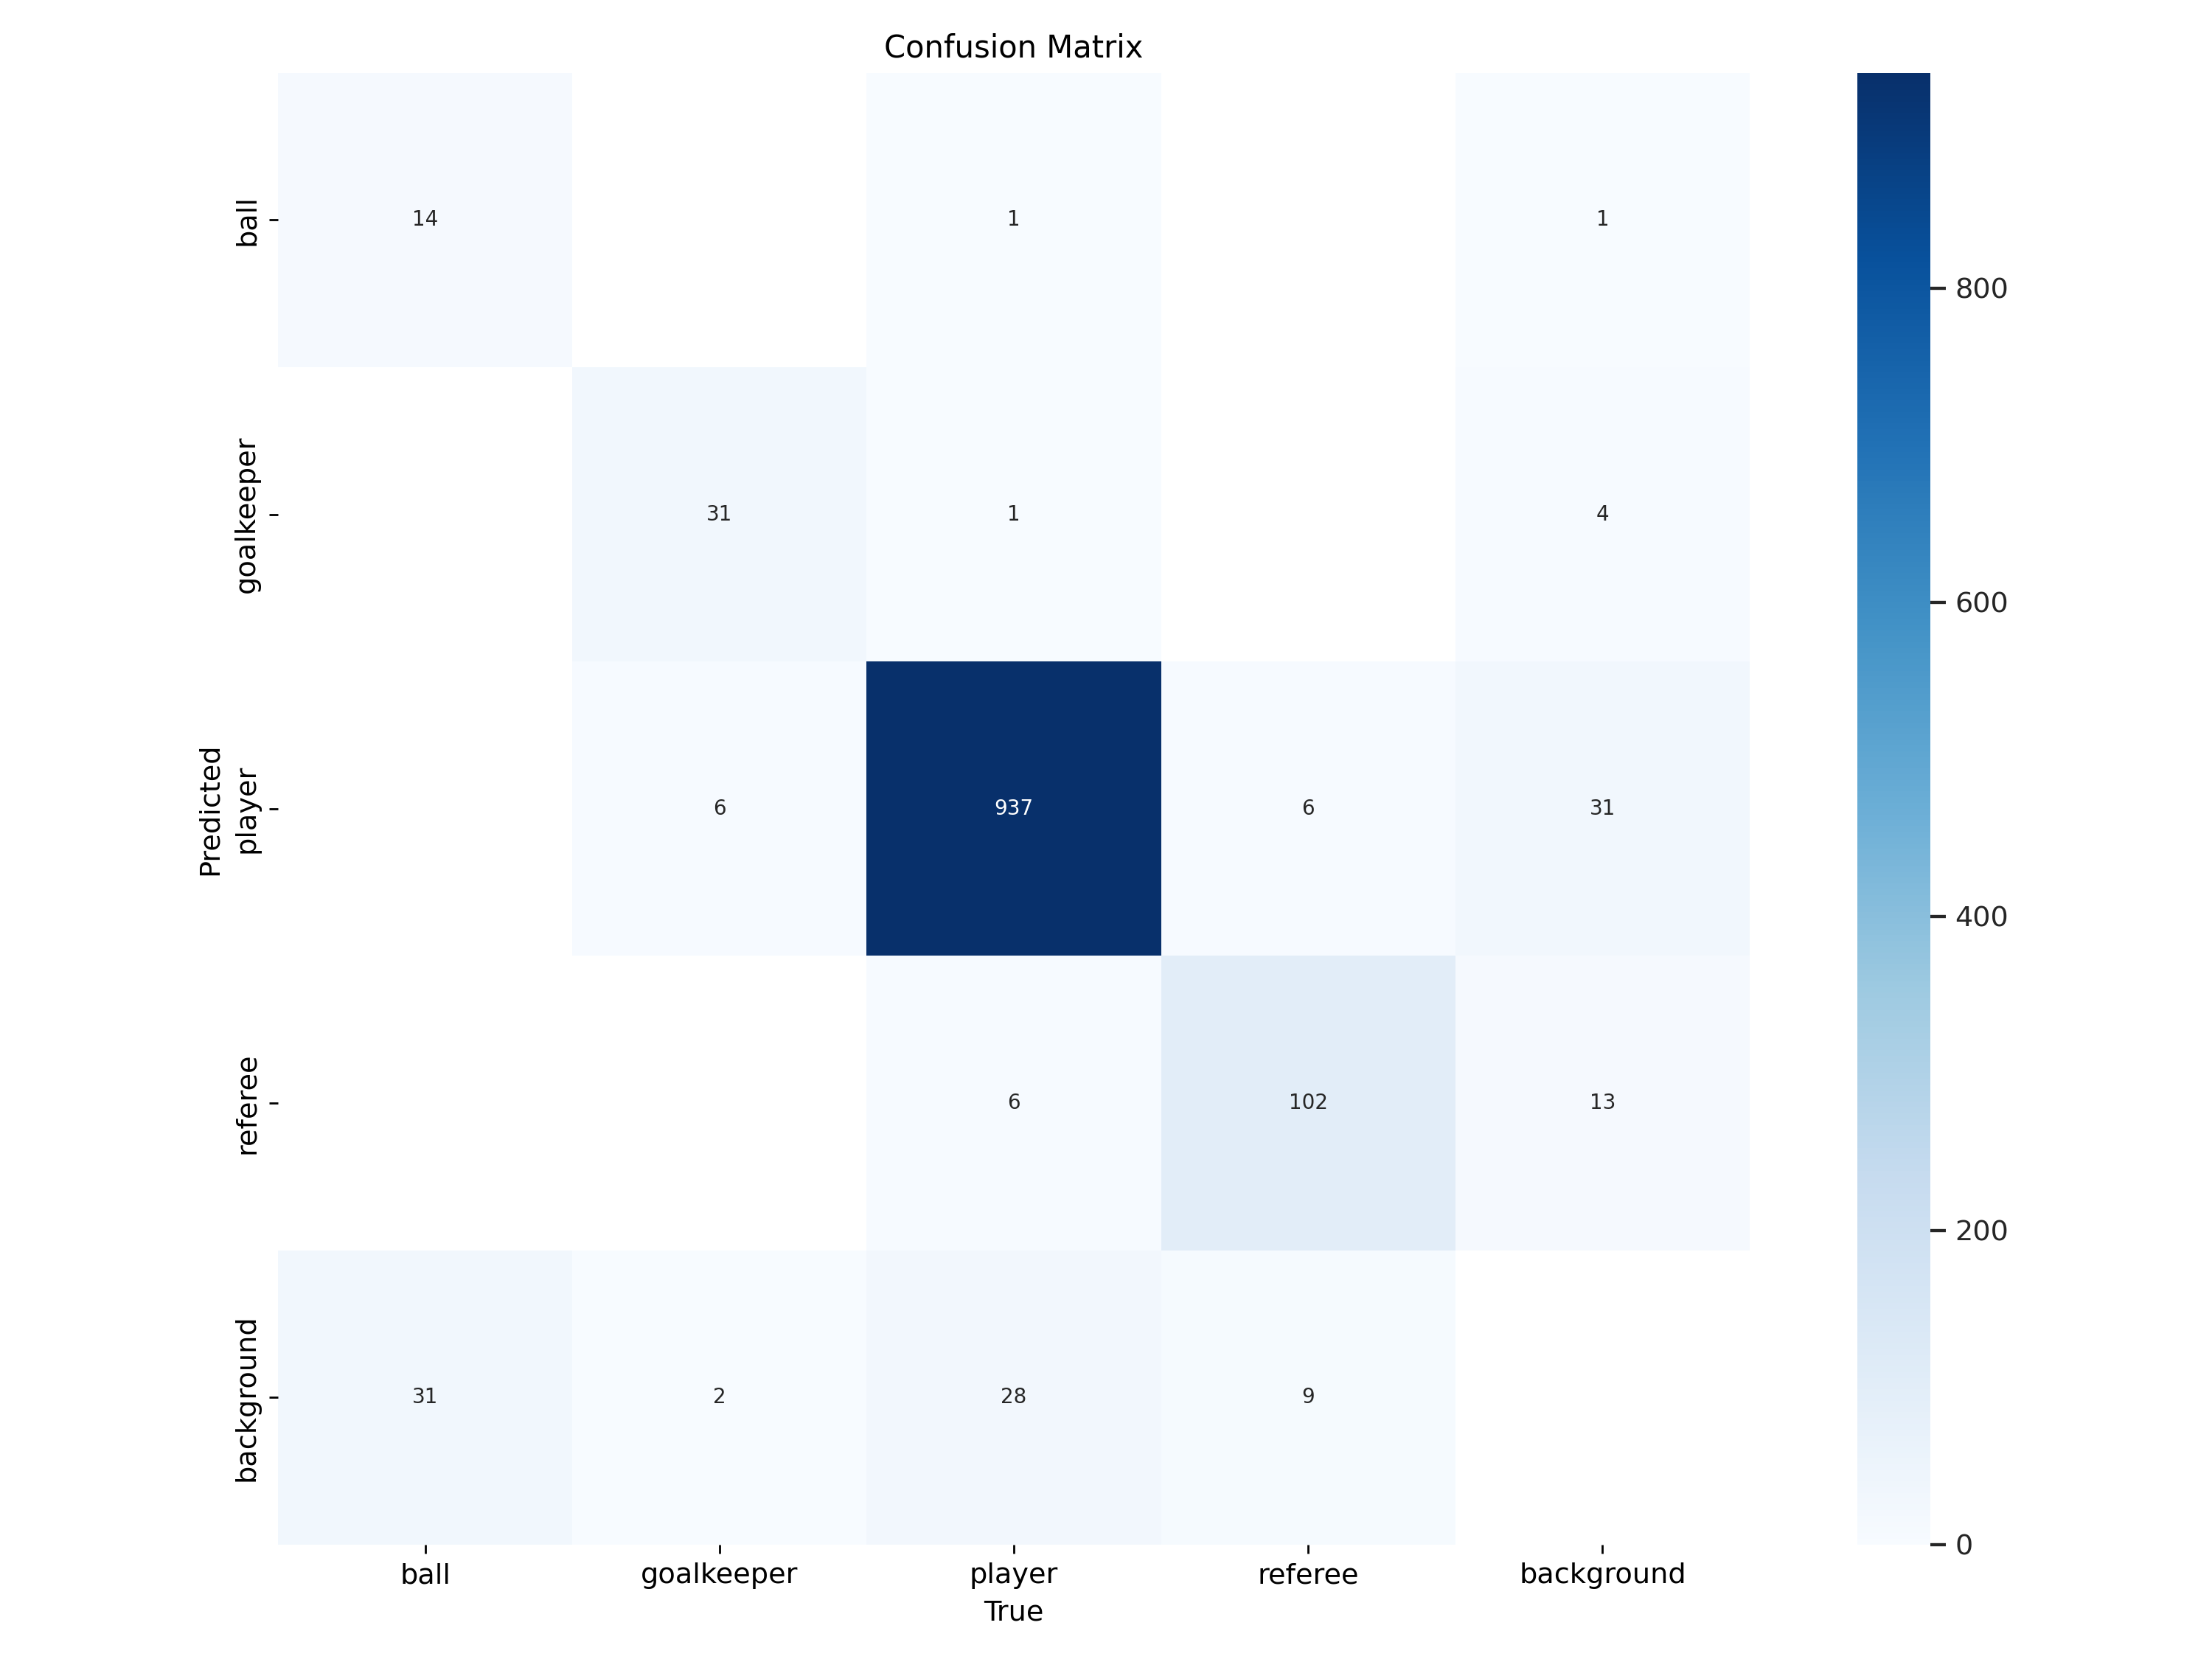

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

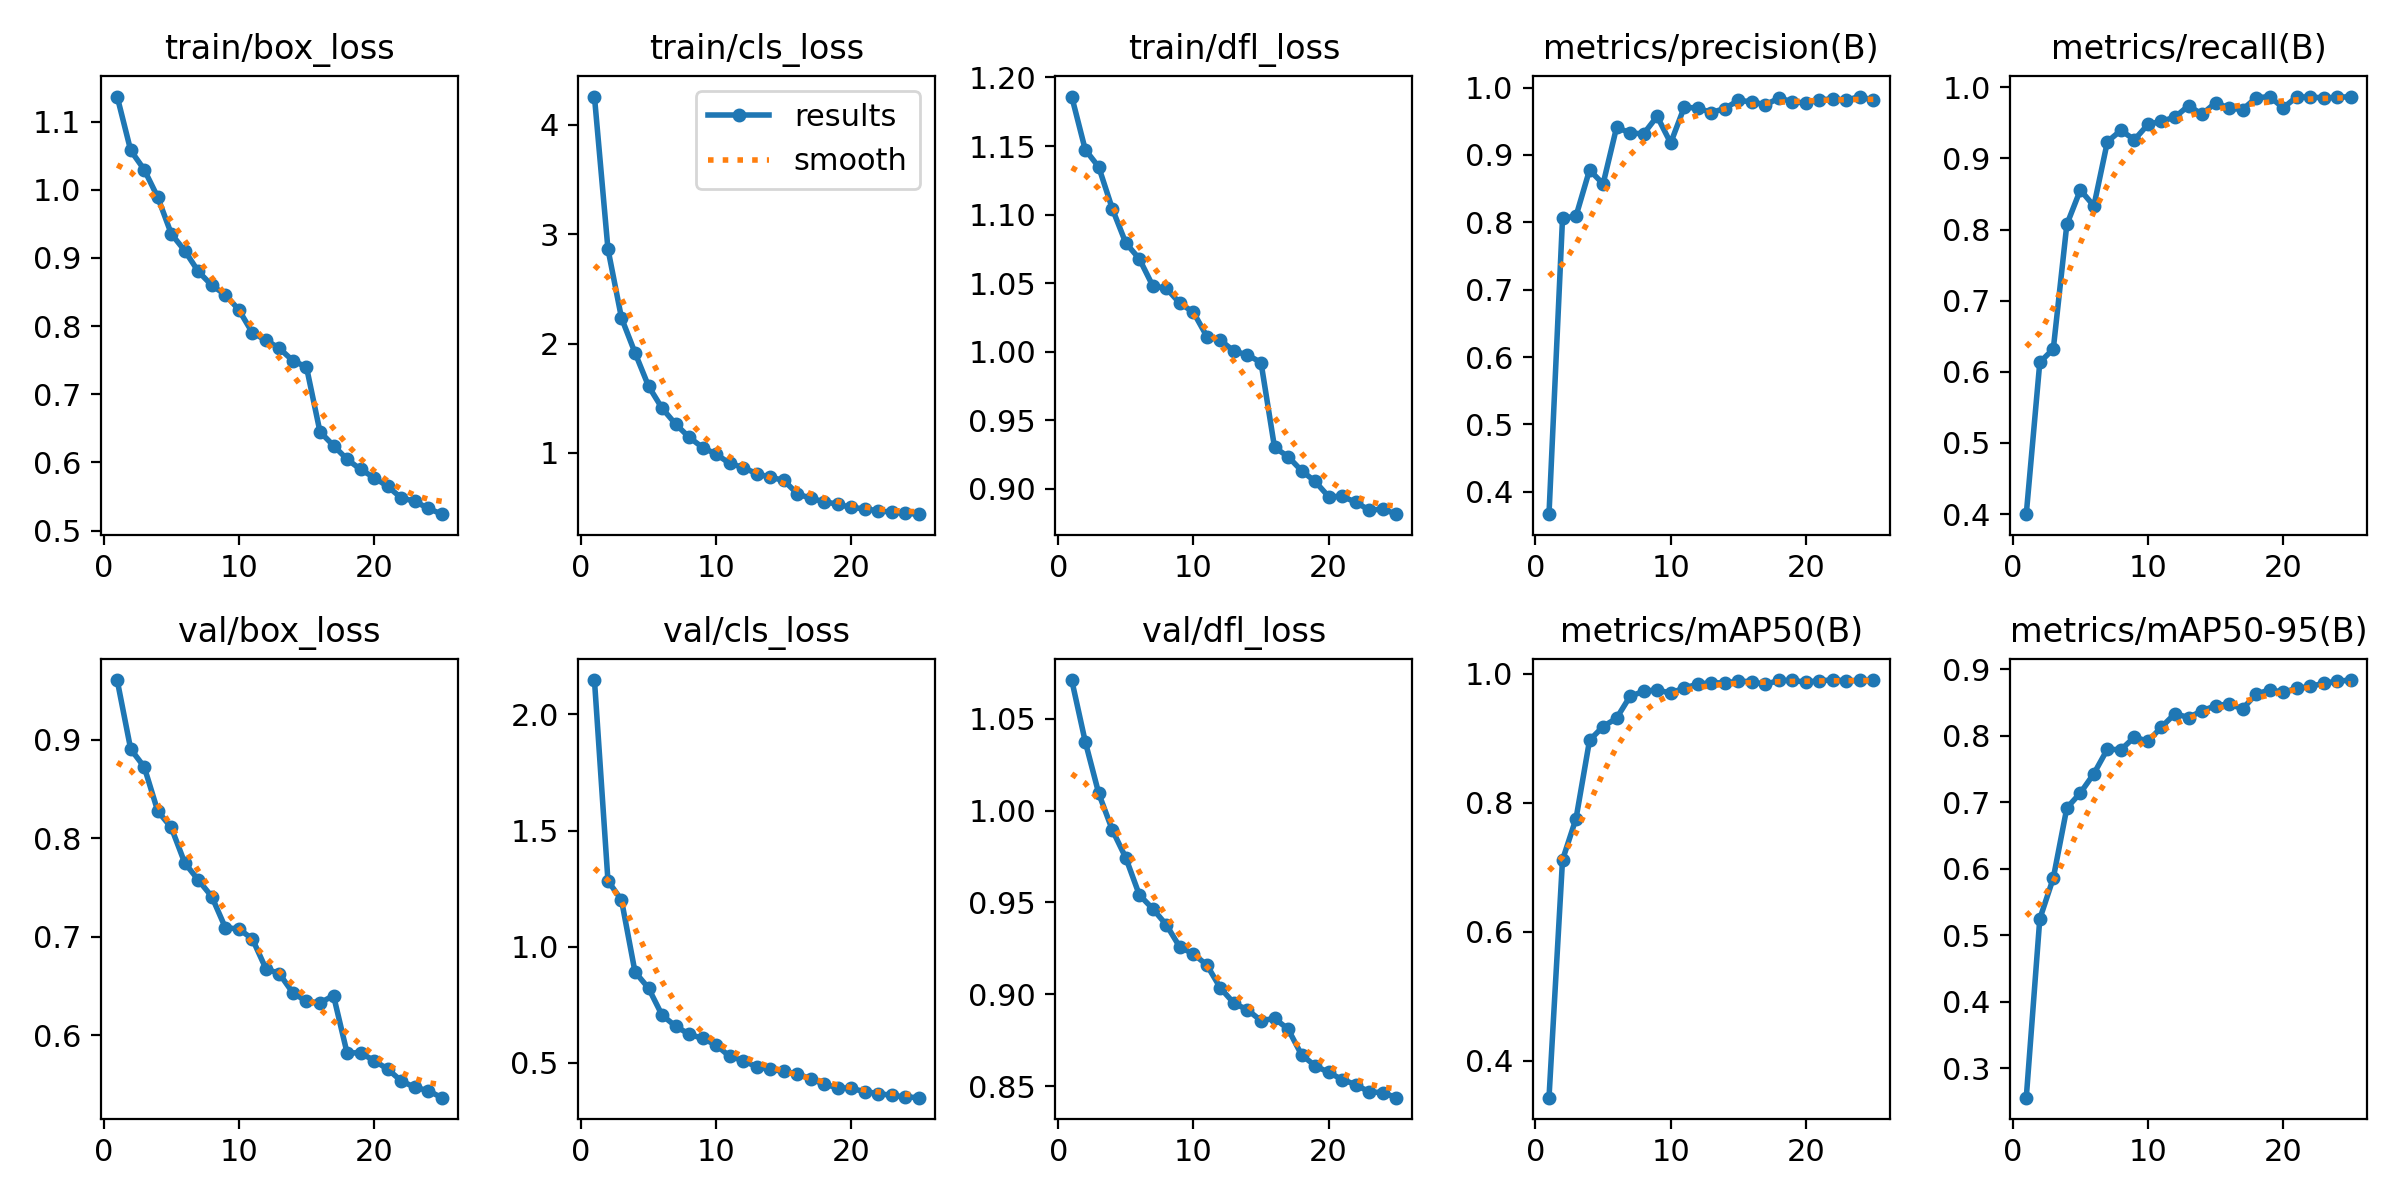

In [9]:
from IPython.display import Image
Image(filename=f'/content/runs/detect/FOD_ilk_deneme5/results.png', width=600)

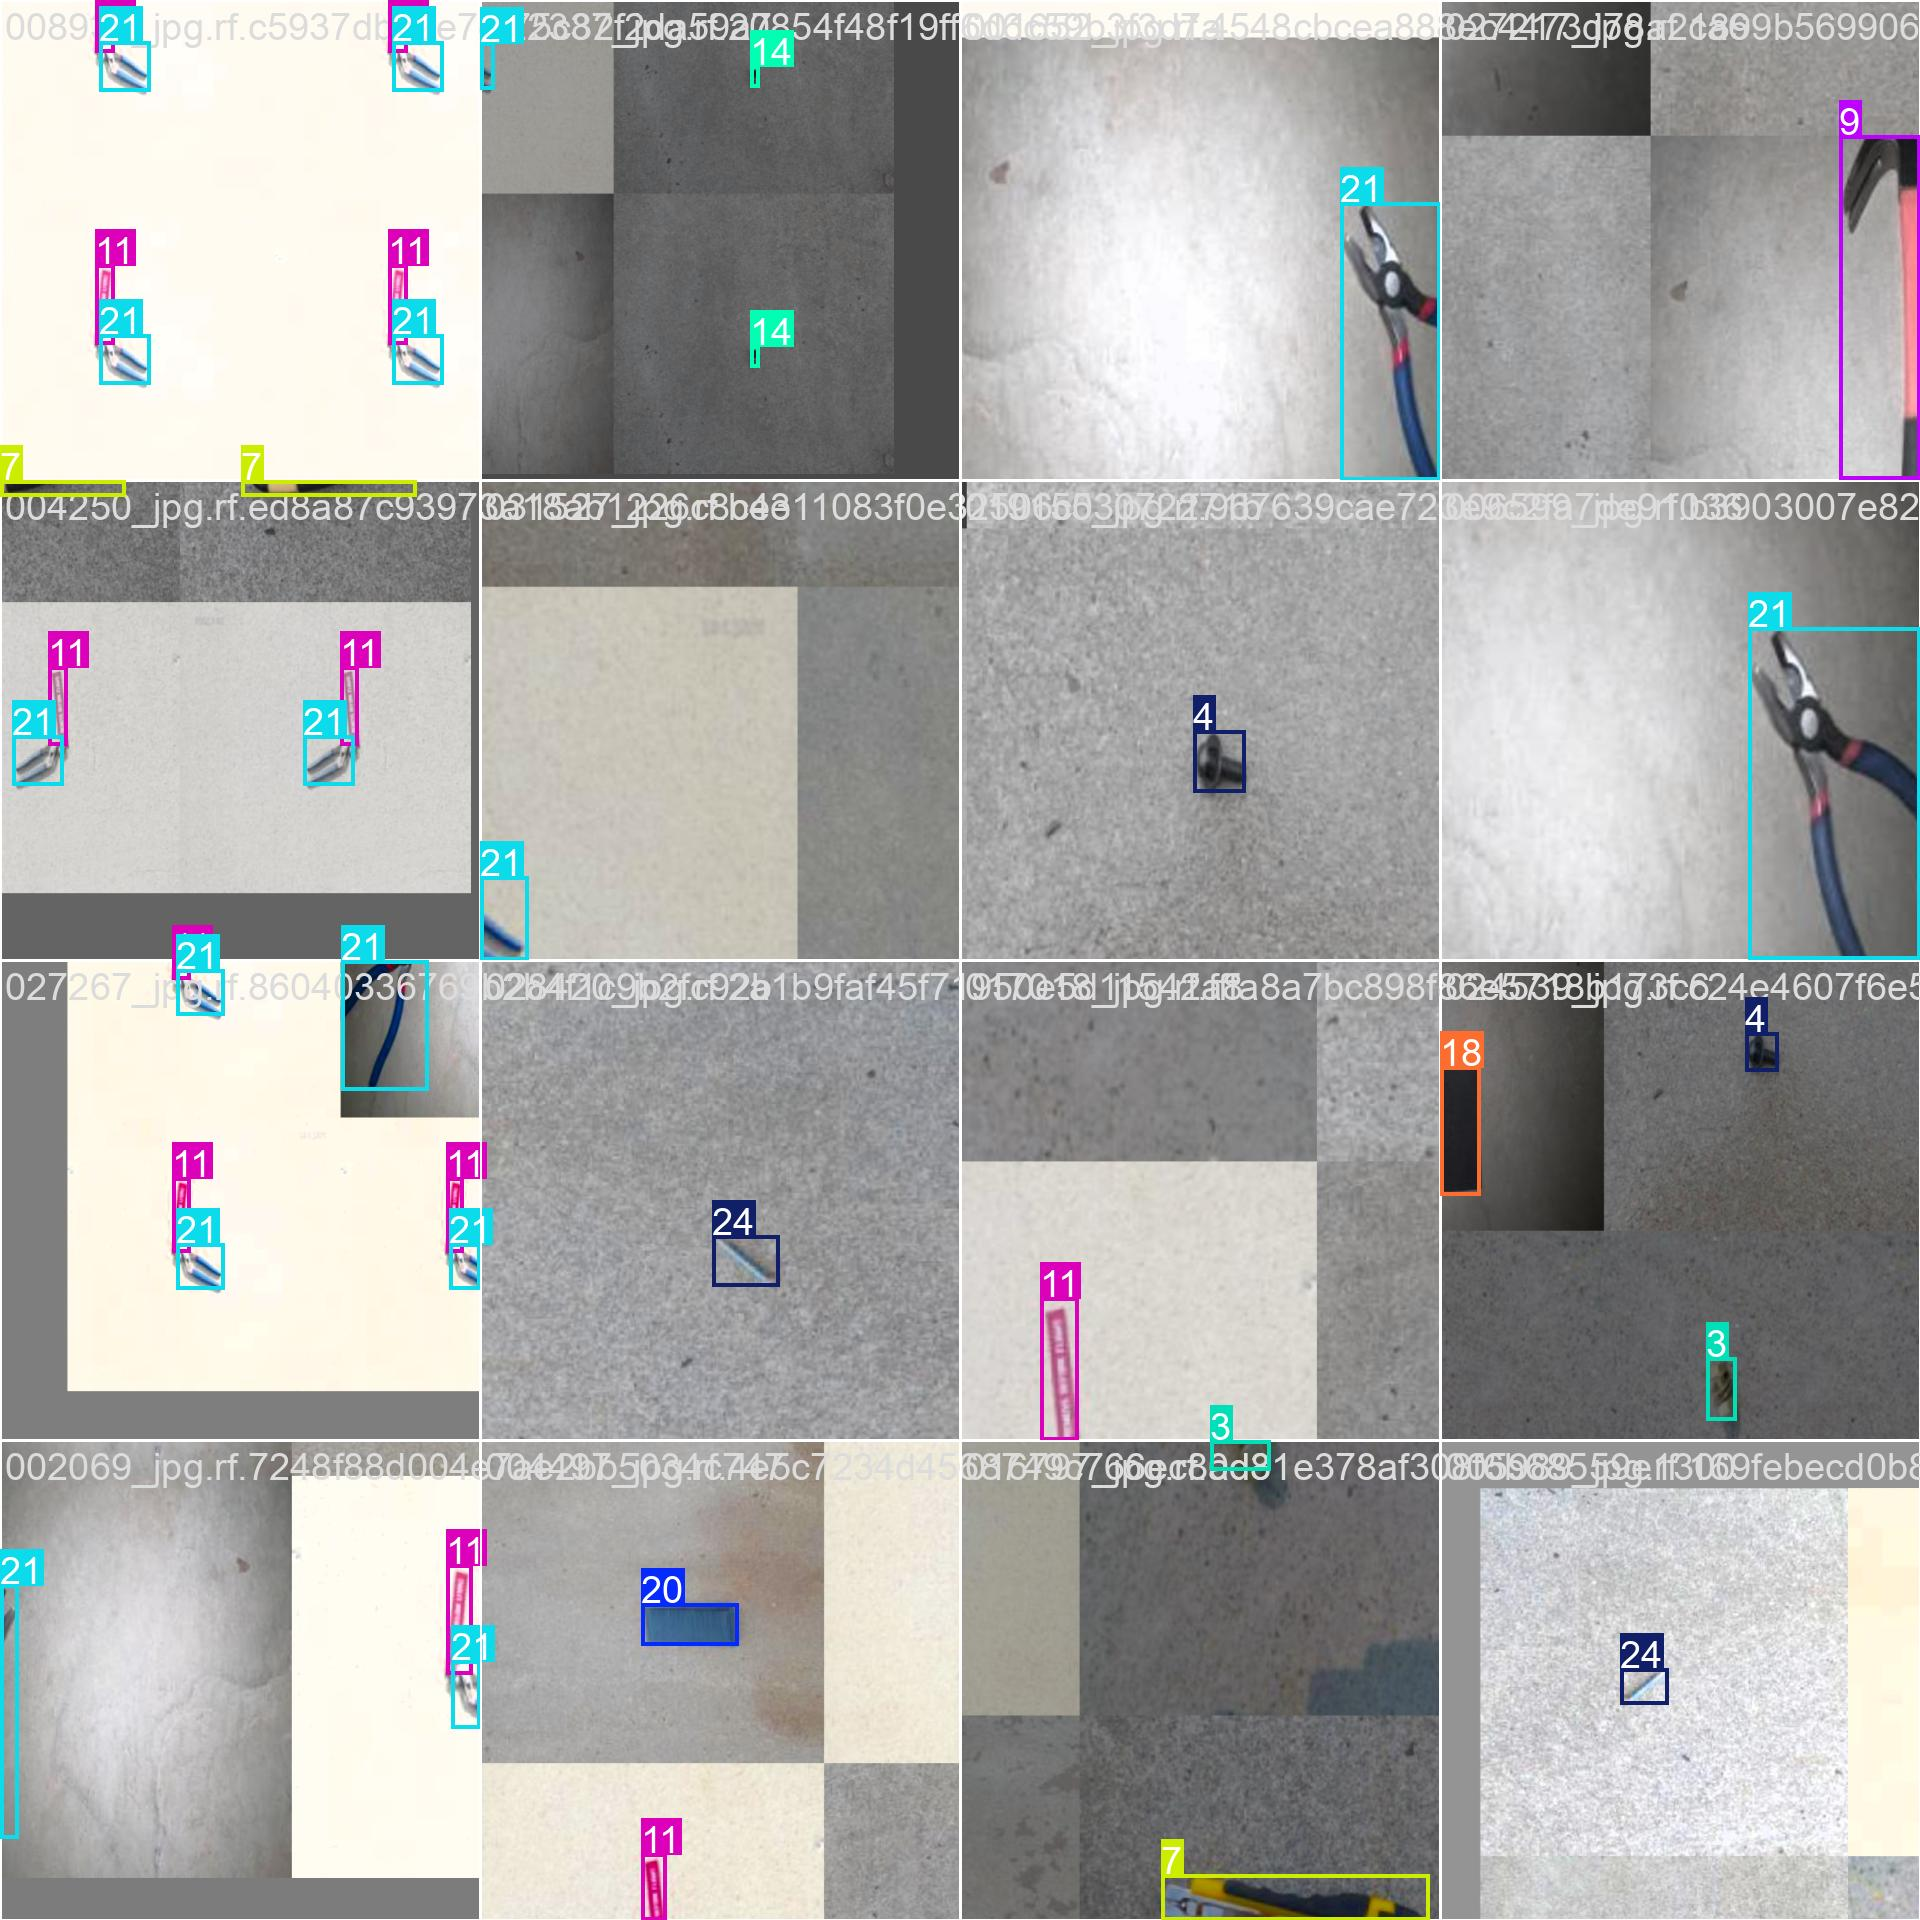

In [12]:

Image(filename=f'/content/runs/detect/FOD_ilk_deneme5/train_batch0.jpg', width=600)

## Validate Custom Model

In [13]:


!yolo task=detect mode=val model=/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/cfg/__init__.py", line 962, in entrypoint
    model = YOLO(model, task=task)
            ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/models/yolo/model.py", line 83, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/engine/model.py", line 153, in __init__
    self._load(model, task=task)
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/engine/model.py", line 297, in _load
    self.model, self.ckpt = load_checkpoint(weights)
                            ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/nn/tasks.py", line 1517, in load_checkpoint
    ckpt, weight = torch_safe_load(weight)  # load ckpt
                   ^^^^^^^^^

## Inference with Custom Model

In [22]:

!yolo task=detect mode=predict model=/content/runs/detect/FOD_ilk_deneme5/weights/best.pt conf=0.25 source=/content/FOD-Detection-3/test/images save=True

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,011,693 parameters, 0 gradients, 8.1 GFLOPs

image 1/816 /content/FOD-Detection-3/test/images/000003_jpg.rf.c4a49c326b71e86f4b3b913c32f75430.jpg: 640x640 1 Batterytrack_idkeyframe, 17.2ms
image 2/816 /content/FOD-Detection-3/test/images/000126_jpg.rf.ef58d3f2fbd3b11e1d99ffcf297c34c6.jpg: 640x640 1 Batterytrack_idkeyframe, 8.2ms
image 3/816 /content/FOD-Detection-3/test/images/000142_jpg.rf.a4cde8899b36e4ca43ed49abdfd65e32.jpg: 640x640 1 Batterytrack_idkeyframe, 7.6ms
image 4/816 /content/FOD-Detection-3/test/images/000189_jpg.rf.476f480eb759ed2ef5666bc20cd8edbd.jpg: 640x640 1 Batterytrack_idkeyframe, 7.9ms
image 5/816 /content/FOD-Detection-3/test/images/000205_jpg.rf.cb29627c6a9edc428d0cc823c90d1dd7.jpg: 640x640 1 Batterytrack_idkeyframe, 7.7ms
image 6/816 /content/FOD-Detection-3/test/images/000256_jpg.rf.704bf7393fa3ab55bf0b782d9c500fdf.jpg: 640x640 1 Batterytrack_i

In [24]:
!cat /content/FOD-Detection-3/data.yaml

names:
- AdjustableClamptrack_idkeyframe
- AdjustableWrenchtrack_idkeyframe
- Batterytrack_idkeyframe
- BoltNutSettrack_idkeyframe
- BoltWashertrack_idkeyframe
- Bolttrack_idkeyframe
- ClampParttrack_idkeyframe
- Cuttertrack_idkeyframe
- FuelCaptrack_idkeyframe
- Hammertrack_idkeyframe
- Hosetrack_idkeyframe
- Labeltrack_idkeyframe
- LuggageParttrack_idkeyframe
- LuggageTagtrack_idkeyframe
- MetalParttrack_idkeyframe
- MetalSheettrack_idkeyframe
- Nailtrack_idkeyframe
- Nuttrack_idkeyframe
- PaintChiptrack_idkeyframe
- Pentrack_idkeyframe
- PlasticParttrack_idkeyframe
- Plierstrack_idkeyframe
- Rocktrack_idkeyframe
- Screwdrivertrack_idkeyframe
- Screwtrack_idkeyframe
- SodaCantrack_idkeyframe
- Tapetrack_idkeyframe
- Washertrack_idkeyframe
- Wiretrack_idkeyframe
- Woodtrack_idkeyframe
- Wrenchtrack_idkeyframe
nc: 31
roboflow:
  license: CC BY 4.0
  project: fod-detection-1kzkm-y1lck
  url: https://universe.roboflow.com/foddetection-ha1co/fod-detection-1kzkm-y1lck/dataset/3
  version: 

**NOTE:** Let's take a look at few results.

Bu kod bloğu, en son yapılan Ultralytics YOLO tahmin (prediction) işleminin çıktılarını otomatik olarak bulur ve görüntüleyerek sonuçları hızlıca incelemenizi sağlar.

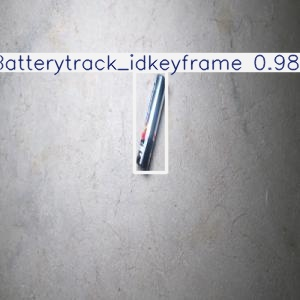

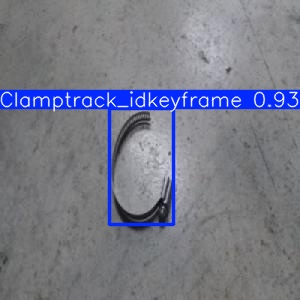

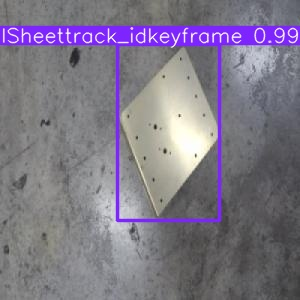

In [25]:
import glob
import os
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [31]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"/runs/detect/train/")

Dependency ultralytics==8.0.196 is required but found version=8.3.223, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: n


SystemExit: 1

To exit: use 'exit', 'quit', or Ctrl-D.


Follow the links above to check if the upload succeeded. It may take a couple of minutes until the model is visible to the `roboflow` SDK.

In [ ]:
# Run inference on your model on a persistent, auto-scaling, cloud API

# Load model
model = project.version(dataset.version).model
assert model, "Model deployment is still loading"

# Choose a random test image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on 4b770a_3_9_png.rf.26fd0dc802e143501b91eddef365a94d.jpg


{'predictions': [{'x': 1227.0,
   'y': 527.5,
   'width': 50.0,
   'height': 77.0,
   'confidence': 0.9045102000236511,
   'class': 'player',
   'class_id': 2,
   'detection_id': '7bb0de78-c58d-454a-b693-c3f518f94f80',
   'image_path': '/content/datasets/football-players-obj-detection-1/test/images/4b770a_3_9_png.rf.26fd0dc802e143501b91eddef365a94d.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 731.0,
   'y': 584.5,
   'width': 52.0,
   'height': 79.0,
   'confidence': 0.8924632668495178,
   'class': 'player',
   'class_id': 2,
   'detection_id': 'b3ea8a5a-5294-45c9-9221-ba8a6f0884b5',
   'image_path': '/content/datasets/football-players-obj-detection-1/test/images/4b770a_3_9_png.rf.26fd0dc802e143501b91eddef365a94d.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 1397.5,
   'y': 344.5,
   'width': 31.0,
   'height': 55.0,
   'confidence': 0.8912790417671204,
   'class': 'player',
   'class_id': 2,
   'detection_id': '5ef87756-163e-442c-ad88-35f3572750d5',
   '

# Deploy Your Model to the Edge

In addition to using the Roboflow hosted API for deployment, you can use [Roboflow Inference](https://inference.roboflow.com), an open source inference solution that has powered millions of API calls in production environments. Inference works with CPU and GPU, giving you immediate access to a range of devices, from the NVIDIA Jetson to TRT-compatible devices to ARM CPU devices.

With Roboflow Inference, you can self-host and deploy your model on-device. You can deploy applications using the [Inference Docker containers](https://inference.roboflow.com/quickstart/docker/) or the pip package.

For example, to install Inference on a device with an NVIDIA GPU, we can use:

```
docker pull roboflow/roboflow-inference-server-gpu
```

Then we can run inference via HTTP:

```python
import requests

workspace_id = ""
model_id = ""
image_url = ""
confidence = 0.75
api_key = ""

infer_payload = {
    "image": {
        "type": "url",
        "value": image_url,
    },
    "confidence": confidence,
    "iou_threshold": iou_thresh,
    "api_key": api_key,
}
res = requests.post(
    f"http://localhost:9001/{workspace_id}/{model_id}",
    json=infer_object_detection_payload,
)

predictions = res.json()
```

Above, set your Roboflow workspace ID, model ID, and API key.

- [Find your workspace and model ID](https://docs.roboflow.com/api-reference/workspace-and-project-ids?ref=blog.roboflow.com)
- [Find your API key](https://docs.roboflow.com/api-reference/authentication?ref=blog.roboflow.com#retrieve-an-api-key)

Also, set the URL of an image on which you want to run inference. This can be a local file.

_To use your YOLOv5 model commercially with Inference, you will need a Roboflow Enterprise license, through which you gain a pass-through license for using YOLOv5. An enterprise license also grants you access to features like advanced device management, multi-model containers, auto-batch inference, and more._